# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [5]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [6]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [7]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [8]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Load the dataset
data = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")

# Data Preprocessing and Feature Engineering
# Replace the column names below with your actual feature columns
feature_columns = [
    'num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
    'length_of_stay', 'flight_hour', 'flight_day', 'route', 'booking_origin',
    'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals',
    'flight_duration'
]


X = data[feature_columns]  # Features
y = data['booking_complete']  # Target variable

# Perform one-hot encoding for categorical features
X = pd.get_dummies(X)

# Split the data into a training set and a testing set (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
clf = RandomForestClassifier(random_state=42)

# Train the model on the training data
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Feature Importance
importances = clf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
print("Feature Importance Scores:")
print(feature_importance_df.sort_values(by='Importance', ascending=False))

# Example prediction
# Example prediction with matching feature names
if __name__ == "__main__":
    new_data = pd.DataFrame({
        'num_passengers': [2],
        'sales_channel_Internet': [1],  # Match one-hot encoding of sales_channel
        'trip_type_RoundTrip': [1],  # Match one-hot encoding of trip_type
        'purchase_lead': [165],
        'length_of_stay': [3],
        'flight_hour': [7],
        'flight_day_Mon': [1],  # Match one-hot encoding of flight_day
        'route_AKLKIX': [1],  # Match one-hot encoding of route
        'booking_origin_Japan': [1],  # Match one-hot encoding of booking_origin
        'wants_extra_baggage': [1],
        'wants_preferred_seat': [0],
        'wants_in_flight_meals': [0],
        'flight_duration': [7]
    })

    # Predict using the trained classifier
    prediction = clf.predict(new_data)
    print("Predicted Booking Completion:", prediction)


Accuracy: 0.8541
Confusion Matrix:
 [[8350  170]
 [1289  191]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92      8520
           1       0.53      0.13      0.21      1480

    accuracy                           0.85     10000
   macro avg       0.70      0.55      0.56     10000
weighted avg       0.82      0.85      0.81     10000

Feature Importance Scores:
             Feature  Importance
1      purchase_lead    0.146071
3        flight_hour    0.120927
2     length_of_stay    0.111578
0     num_passengers    0.046997
7    flight_duration    0.036475
..               ...         ...
536     route_KCHMRU    0.000000
552     route_KIXLBU    0.000000
605     route_KTMTWU    0.000000
587     route_KNOWUH    0.000000
520     route_KBRXIY    0.000000

[923 rows x 2 columns]


ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- booking_origin_(not set)
- booking_origin_Afghanistan
- booking_origin_Algeria
- booking_origin_Argentina
- booking_origin_Australia
- ...


In [ ]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

# Perform cross-validation (example with 5-fold cross-validation)
cv_scores = cross_val_score(clf, X, y, cv=5)

# Print cross-validation scores
print("Cross-validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))  # Top 10 features
plt.title('Top 10 Features by Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


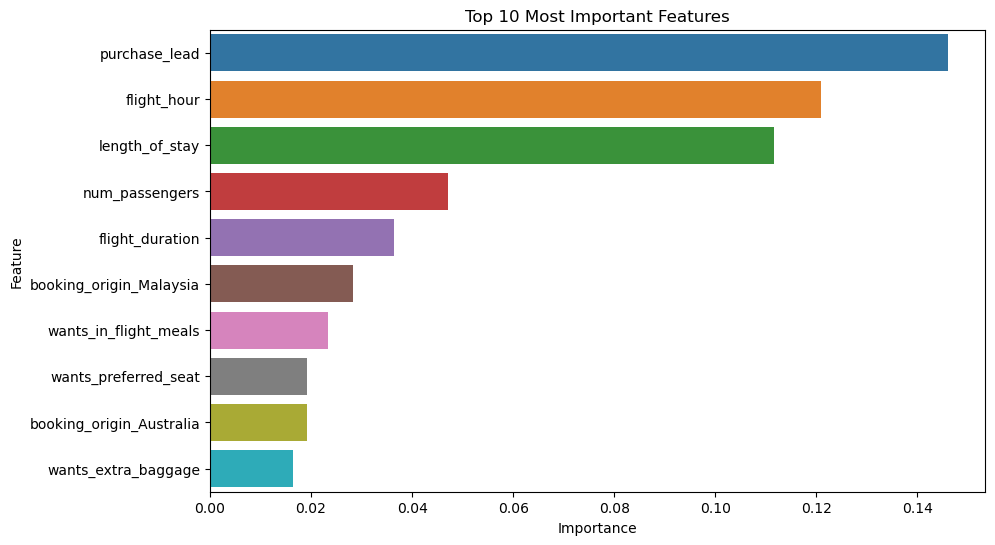

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort the feature importances in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the top N most important features
top_n = 10  # You can adjust this to show the top N features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(top_n))
plt.title(f'Top {top_n} Most Important Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [24]:
pip install python-pptx


     -------------------------------------- 471.5/471.5 kB 1.6 MB/s eta 0:00:00
     -------------------------------------- 153.0/153.0 kB 8.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [28]:
from pptx import Presentation
from pptx.util import Pt,Inches

# Create a new PowerPoint presentation
prs = Presentation()

# Add a title slide
title_slide_layout = prs.slide_layouts[0]
title_slide = prs.slides.add_slide(title_slide_layout)
title = title_slide.shapes.title
title.text = "Model Evaluation Summary"

# Add a slide with evaluation metrics and cross-validation scores
bullet_slide_layout = prs.slide_layouts[1]
eval_metrics_slide = prs.slides.add_slide(bullet_slide_layout)
shapes = eval_metrics_slide.shapes
title_shape = shapes.title
body_shape = shapes.placeholders[1]
title_shape.text = "Evaluation Metrics and Cross-Validation"

# Add content to the evaluation metrics and cross-validation slide
text_frame = body_shape.text_frame
text_frame.text = (
    """
    Accuracy: 0.8541
    Precision: 0.87 (class 0), 0.53 (class 1)
    Recall: 0.98 (class 0), 0.13 (class 1)
    F1-score: 0.92 (class 0), 0.21 (class 1)

    Cross-Validation Scores:
    - Fold 1: 0.8507
    - Fold 2: 0.5734
    - Fold 3: 0.4738
    - Fold 4: 0.4061
    - Fold 5: 0.5823

    Mean Accuracy: 0.5773
    """
)

# Customize the font size of the text
for paragraph in text_frame.paragraphs:
    for run in paragraph.runs:
        run.font.size = Pt(12)

# Add a slide with the feature importance plot
image_slide_layout = prs.slide_layouts[5]
feature_importance_slide = prs.slides.add_slide(image_slide_layout)
title_shape = feature_importance_slide.shapes.title
title_shape.text = "Feature Importance"

# Add the feature importance plot as an image
left = Inches(1)
top = Inches(1.5)
image_path = "feature_importance_plot.png"  # Save the plot as an image
feature_importance_slide.shapes.add_picture(image_path, left, top, height=Inches(4.5))

# Save the PowerPoint presentation
prs.save("model_evaluation_summary.pptx")


FileNotFoundError: [Errno 2] No such file or directory: 'feature_importance_plot.png'